In [3]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [4]:
전data250 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0250.txt")

dx250 = 전data250[:,4]
dy250 = 전data250[:,5]
dz250 = 전data250[:,6]

In [5]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

#https://book.pythontips.com/en/latest/args_and_kwargs.html
def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    lvl1 = 0.30
    lvl1a = 0.41
    lvl1b = 0.51
    lvl2 = 0.64
    lvl3 = 0.77
    
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl2))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl3))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1a))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1b))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, one_sigma1, one_sigma2, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = [str(lvl1), str(lvl1a), str(lvl1b), str(lvl2), str(lvl3)][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

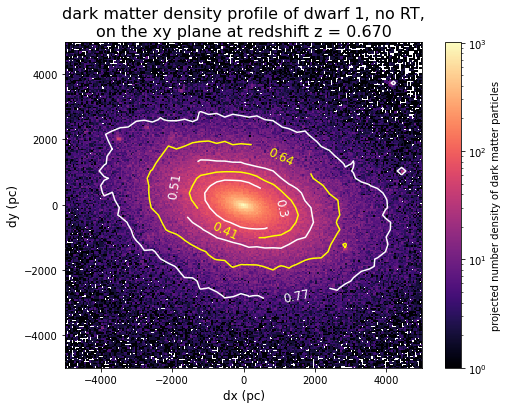

In [6]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx250, dy250, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx250, dy250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dy (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xy plane at redshift z = 0.670', \
          loc='center', fontsize=16)

plt.savefig("0250_dx_dy.png")

plt.show()

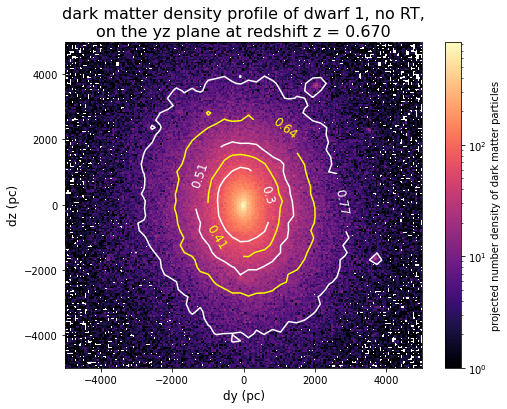

In [7]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dy250, dz250, bins=390, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dy250, dz250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dy (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the yz plane at redshift z = 0.670', \
          loc='center', fontsize=16)

plt.savefig("0250_dy_dz.png")

plt.show()

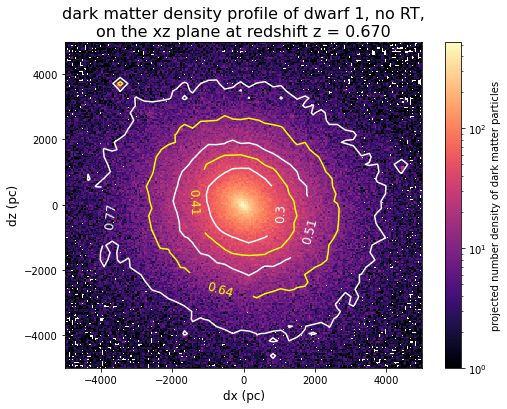

In [8]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx250, dz250, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx250, dz250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xz plane at redshift z = 0.670', \
          loc='center', fontsize=16)

plt.savefig("0250_dx_dz.png")

plt.show()

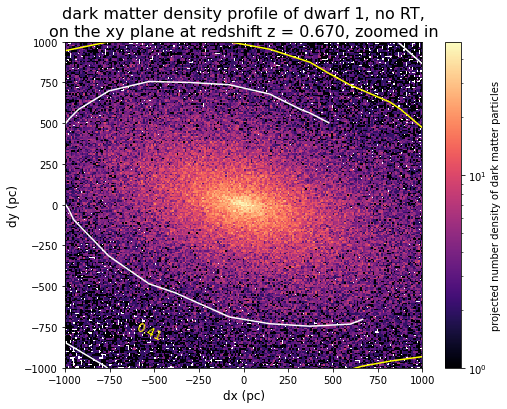

In [9]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx250, dy250, bins=2000, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx250, dy250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dy (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xy plane at redshift z = 0.670, zoomed in', \
          loc='center', fontsize=16)

plt.savefig("0250_dx_dy_closeup.png")

plt.show()

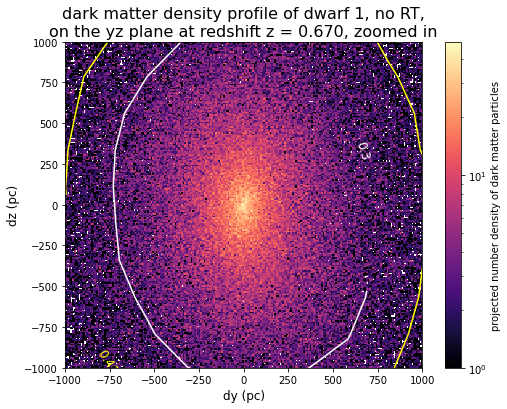

In [10]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dy250, dz250, bins=2000, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dy250, dz250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dy (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the yz plane at redshift z = 0.670, zoomed in', \
          loc='center', fontsize=16)

plt.savefig("0250_dy_dz_closeup.png")

plt.show()

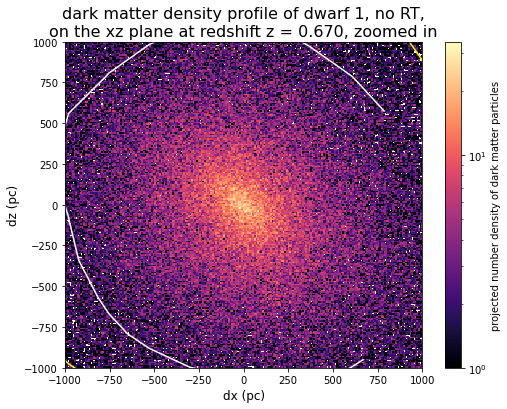

In [11]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx250, dz250, bins=2000, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx250, dz250, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xz plane at redshift z = 0.670, zoomed in', \
          loc='center', fontsize=16)

plt.savefig("0250_dx_dz_closeup.png")

plt.show()